# <b> <center style="background-color:DodgerBlue;"> Rain Prediction - ANN </center> </b>


#### -*- coding: utf-8 -*-
#### Indentation: Jupyter Notebook

__version__='1.0.0'
__author__="Sourav Raj, Nitin Agarwal, Anusha linda kostka j e"
__email__="2020sc04304@wilp.bits-pilani.ac.in; 2020sc04557@wilp.bits-pilani.ac.in; 2020sc04900@wilp.bits-pilani.ac.in"

## 1.a Importing required libraries

In [33]:
# Used for reading and manipulating dataset
import pandas as pd
import numpy as np

# Used for data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pandas_profiling import ProfileReport

#for data preprocessing 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

#for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# for class imbalance
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.utils import shuffle
from sklearn.utils import resample

# Used for model Creation 
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers
from keras import callbacks

#for measuring performance of model
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score

from google.colab import drive

# for Hyper Parameter Tuning
from kerastuner.tuners import RandomSearch
import keras_tuner as kt

# 1.b Import data

In [9]:
drive.mount('colabdata/')

Drive already mounted at colabdata/; to attempt to forcibly remount, call drive.mount("colabdata/", force_remount=True).


In [10]:
# Read the input dataset using pandas and converet to a pandas dataframe
data="/content/colabdata/MyDrive/colabData/WeatherAUS/weatherAUS.csv"
weatherAUS = pd.read_csv(data)

# 2. Data Visualization and Exploration

- We have imported the data. Now let's explore the data to gain insight about it

2.1 Preview the data by printing 5 rows

In [74]:
weatherAUS.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


2.2 View dimensions of dataset

In [75]:
weatherAUS.shape

(145460, 23)

<b>Observation</b>: We can see that there are 145460 instances and 23 variables in the data set.

2.3 View column names 

In [76]:
weatherAUS.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

2.4 View summary of dataset 

In [77]:
weatherAUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<b>Observation</b>: 
    
    We can see that the dataset contains mixture of categorical and numerical variables.
    Categorical variables have data type object.
    Numerical variables have data type float64.
    Also, there are some missing values in the dataset. We will take care of it later.

2.5 View statistical summary of dataset 

In [78]:
weatherAUS.describe().T.style.bar(subset=['mean'], color='green')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                             .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.000000,12.194034,6.398495,-8.500000,7.600000,12.000000,16.900000,33.900000
MaxTemp,144199.000000,23.221348,7.119049,-4.800000,17.900000,22.600000,28.200000,48.100000
Rainfall,142199.000000,2.360918,8.478060,0.000000,0.000000,0.000000,0.800000,371.000000
Evaporation,82670.000000,5.468232,4.193704,0.000000,2.600000,4.800000,7.400000,145.000000
Sunshine,75625.000000,7.611178,3.785483,0.000000,4.800000,8.400000,10.600000,14.500000
WindGustSpeed,135197.000000,40.035230,13.607062,6.000000,31.000000,39.000000,48.000000,135.000000
WindSpeed9am,143693.000000,14.043426,8.915375,0.000000,7.000000,13.000000,19.000000,130.000000
WindSpeed3pm,142398.000000,18.662657,8.809800,0.000000,13.000000,19.000000,24.000000,87.000000
Humidity9am,142806.000000,68.880831,19.029164,0.000000,57.000000,70.000000,83.000000,100.000000
Humidity3pm,140953.000000,51.539116,20.795902,0.000000,37.000000,52.000000,66.000000,100.000000


<b>Observation</b>: 
    
    We can see that the dataset have significant different range of values of variables so scaling required.
    Some of the variables are skewed, will further check by plotting.
    some of variables (Rainfall, Evaporation etc.) is having outliars, will further check by plotting.

2.6 View duplicate records in dataset

In [79]:
weatherAUS.duplicated().sum()

0

<b>Observation</b>: 
    There is no duplicate records

<b> 2.7 Univariate Analysis </b>

2.7.1 Distribution of Numerical Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c24843a90>,
      dtype=object)

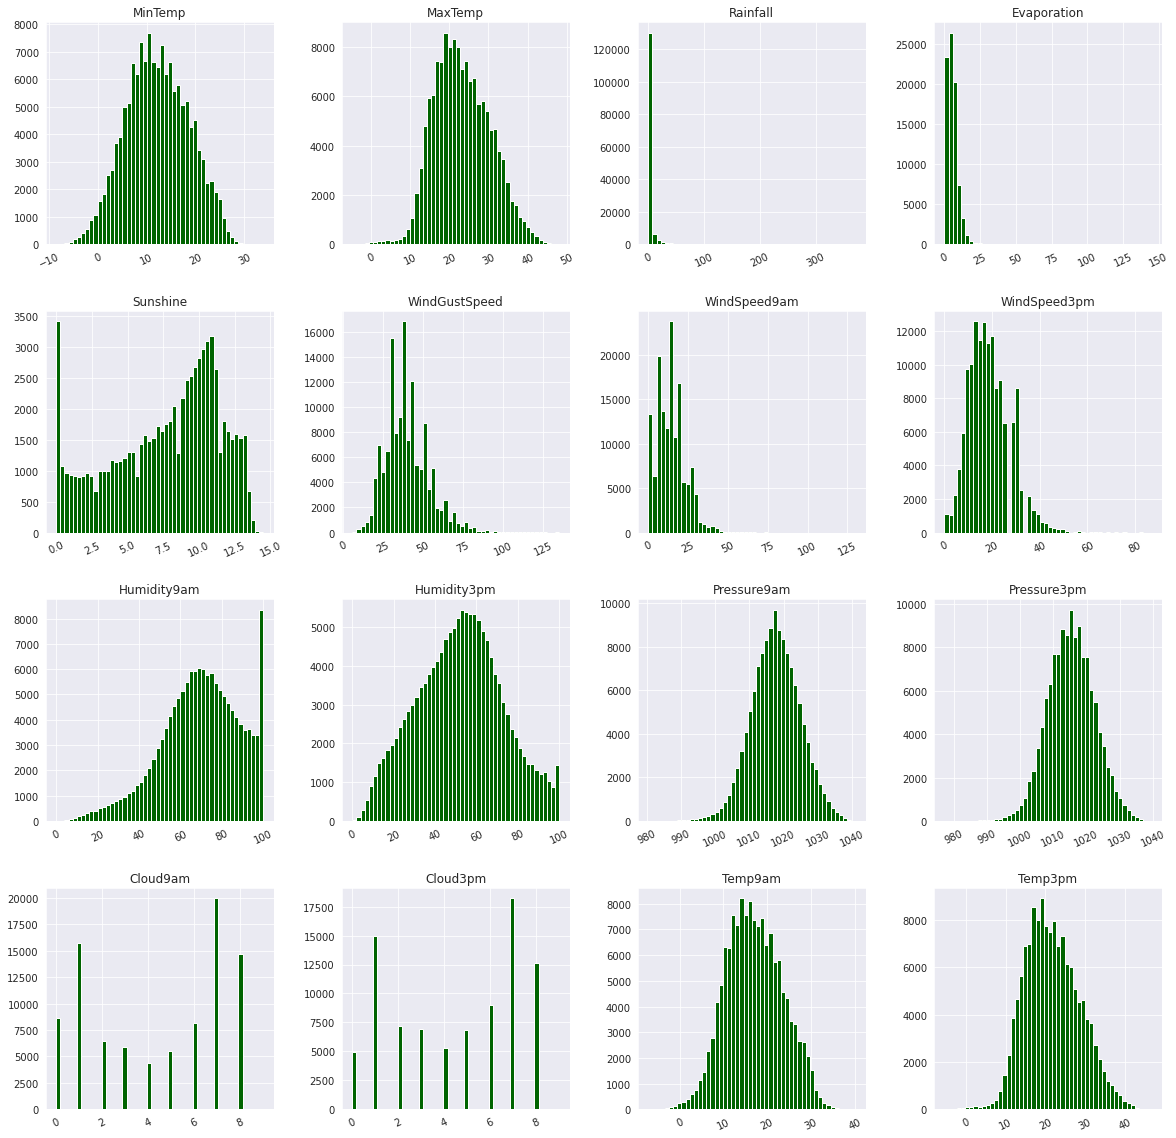

In [80]:
sns.set_style('dark')
weatherAUS.hist(bins=50,figsize=(20,20),color='darkgreen', xrot=25, xlabelsize=10)

2.7.2 CountPlot of Categorical Features

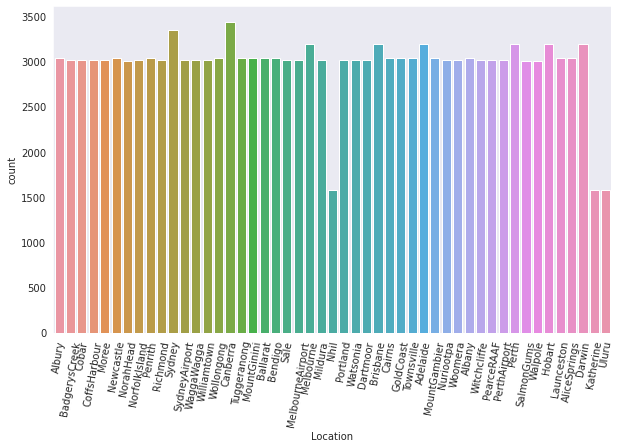

In [81]:
for col in ['Location']:
    fig, ax = plt.subplots(1,1, figsize=(10, 6))
    sns.countplot(x=col, data=weatherAUS)
    plt.xticks(rotation=80)
#     plt.show()

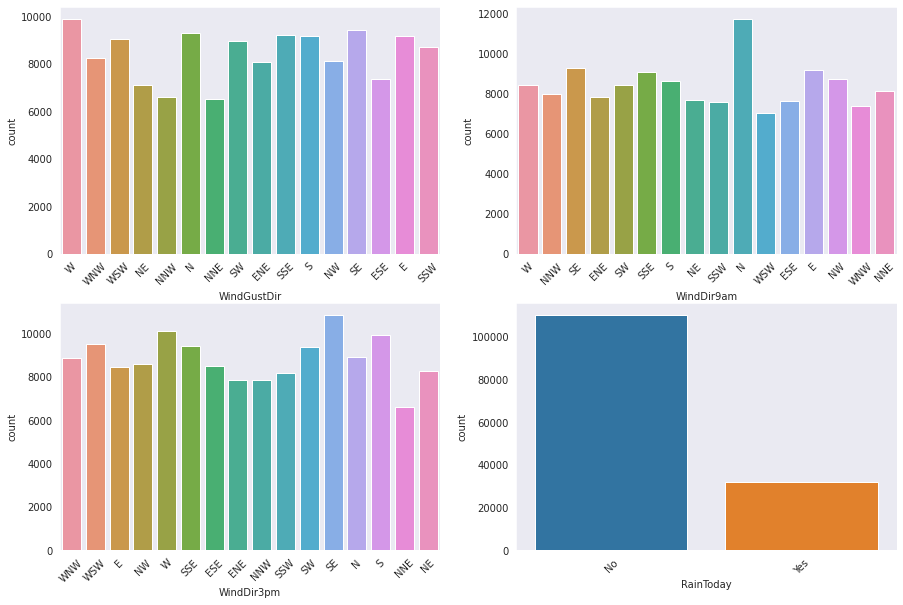

In [82]:
plt.figure(figsize=(15,10))
for i, col in enumerate([ 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']):
    plt.subplot(2, 2, i+1)
    fig = sns.countplot(x=col, data=weatherAUS)
    plt.xticks(rotation=45)

2.7.3 Explore RainTomorrow target variable

In [83]:
weatherAUS['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [84]:
weatherAUS['RainTomorrow'].isnull().sum()

3267

In [85]:
weatherAUS['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [86]:
weatherAUS['RainTomorrow'].value_counts()/len(weatherAUS)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

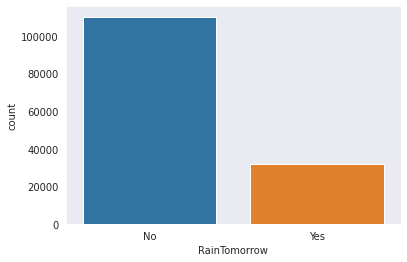

In [87]:
sns.countplot(x="RainTomorrow", data=weatherAUS)

<b>Observation</b>: 
    There is missing value in RainTomorrow variable.
    Class 'Yes' is only 21% as compare to 'No' which is 75% so there is a class imbalance issue.

2.7.4 Cardinality Analysis for categorical variables:

In [88]:
for var in ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']:
    print(f' "{var}" variable contains {len(weatherAUS[var].unique())} labels')

 "Date" variable contains 3436 labels
 "Location" variable contains 49 labels
 "WindGustDir" variable contains 17 labels
 "WindDir9am" variable contains 17 labels
 "WindDir3pm" variable contains 17 labels
 "RainToday" variable contains 3 labels


<b> Observation: </b> 
    We can see that "Date" variable is having high cardinality which needs to be preprocessed.

2.8 MultiVariate Analysis

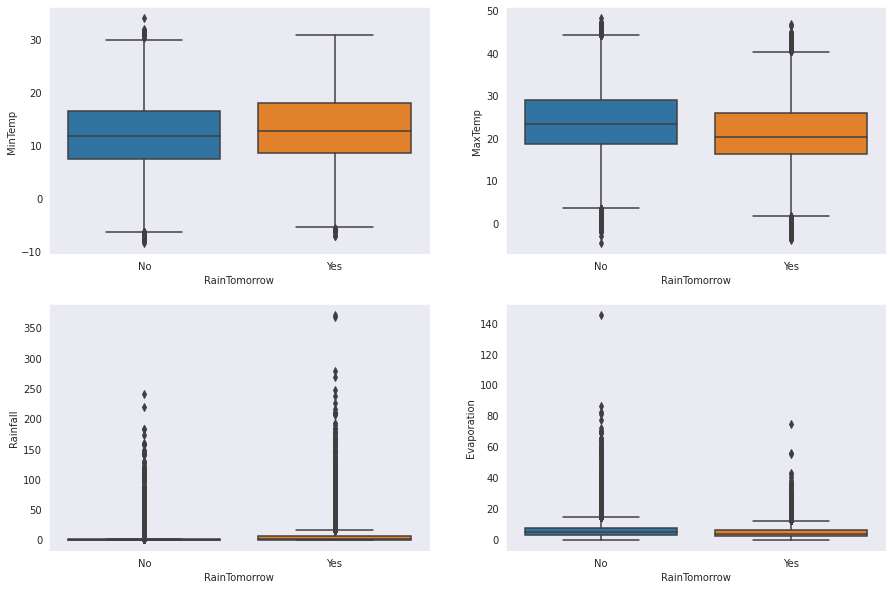

In [89]:
plt.figure(figsize=(15,10))
for i, var in enumerate(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']):
  plt.subplot(2, 2, i+1)
  fig = sns.boxplot(x='RainTomorrow', y=var, data=weatherAUS)

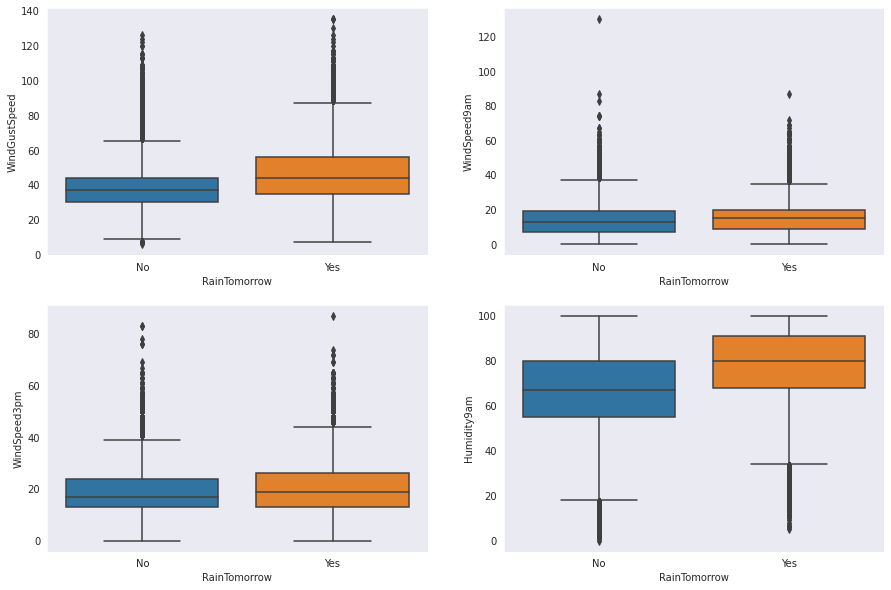

In [90]:
plt.figure(figsize=(15,10))
for i, var in enumerate(['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am']):
  plt.subplot(2, 2, i+1)
  fig = sns.boxplot(x='RainTomorrow', y=var, data=weatherAUS)

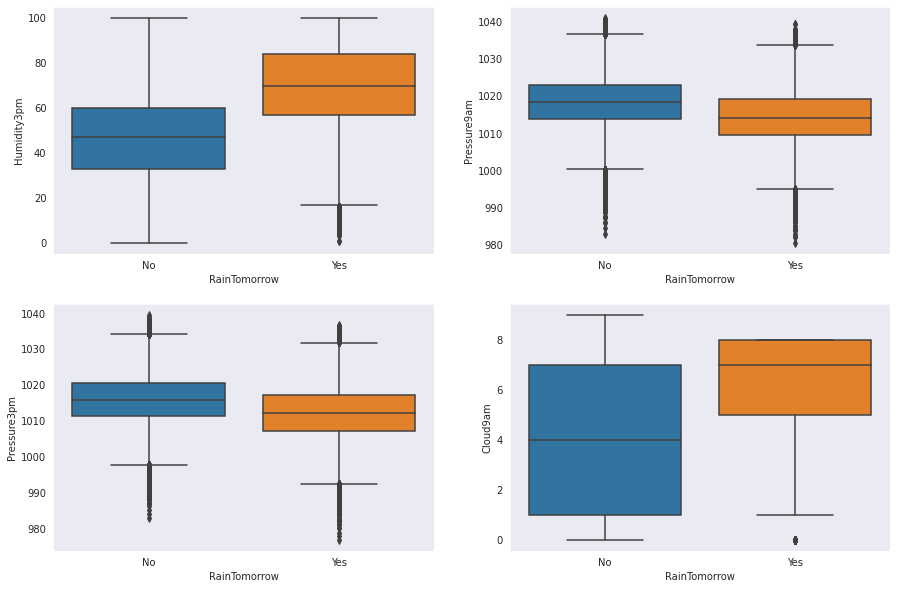

In [91]:
plt.figure(figsize=(15,10))
for i, var in enumerate(['Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',]):
  plt.subplot(2, 2, i+1)
  fig = sns.boxplot(x='RainTomorrow', y=var, data=weatherAUS)
  # fig.set_title(var)

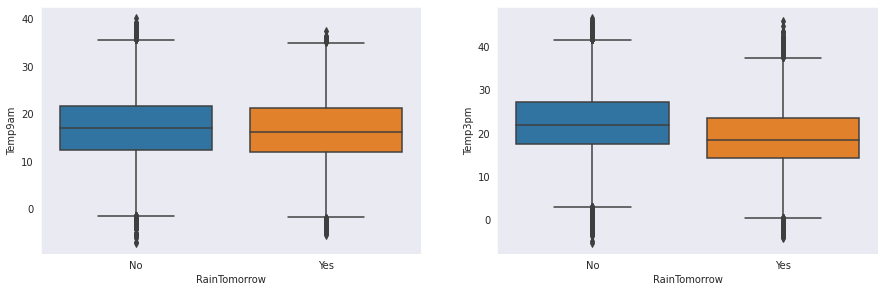

In [92]:
plt.figure(figsize=(15,10))
for i, var in enumerate(['Temp9am','Temp3pm']):
  plt.subplot(2, 2, i+1)
  fig = sns.boxplot(x='RainTomorrow', y=var, data=weatherAUS)

<b> Observation: </b> 
    There is significant impact of "RainFall", "Evaporation", 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Pressure9pm', 'Cloud3pm', 'Cloud9pm' & 'Temp3pm' features on target 'RainTomorrow'. we will further analyze this on correlation plot. 
    Rainfall data cannot be considered as outlier as it depends on season.

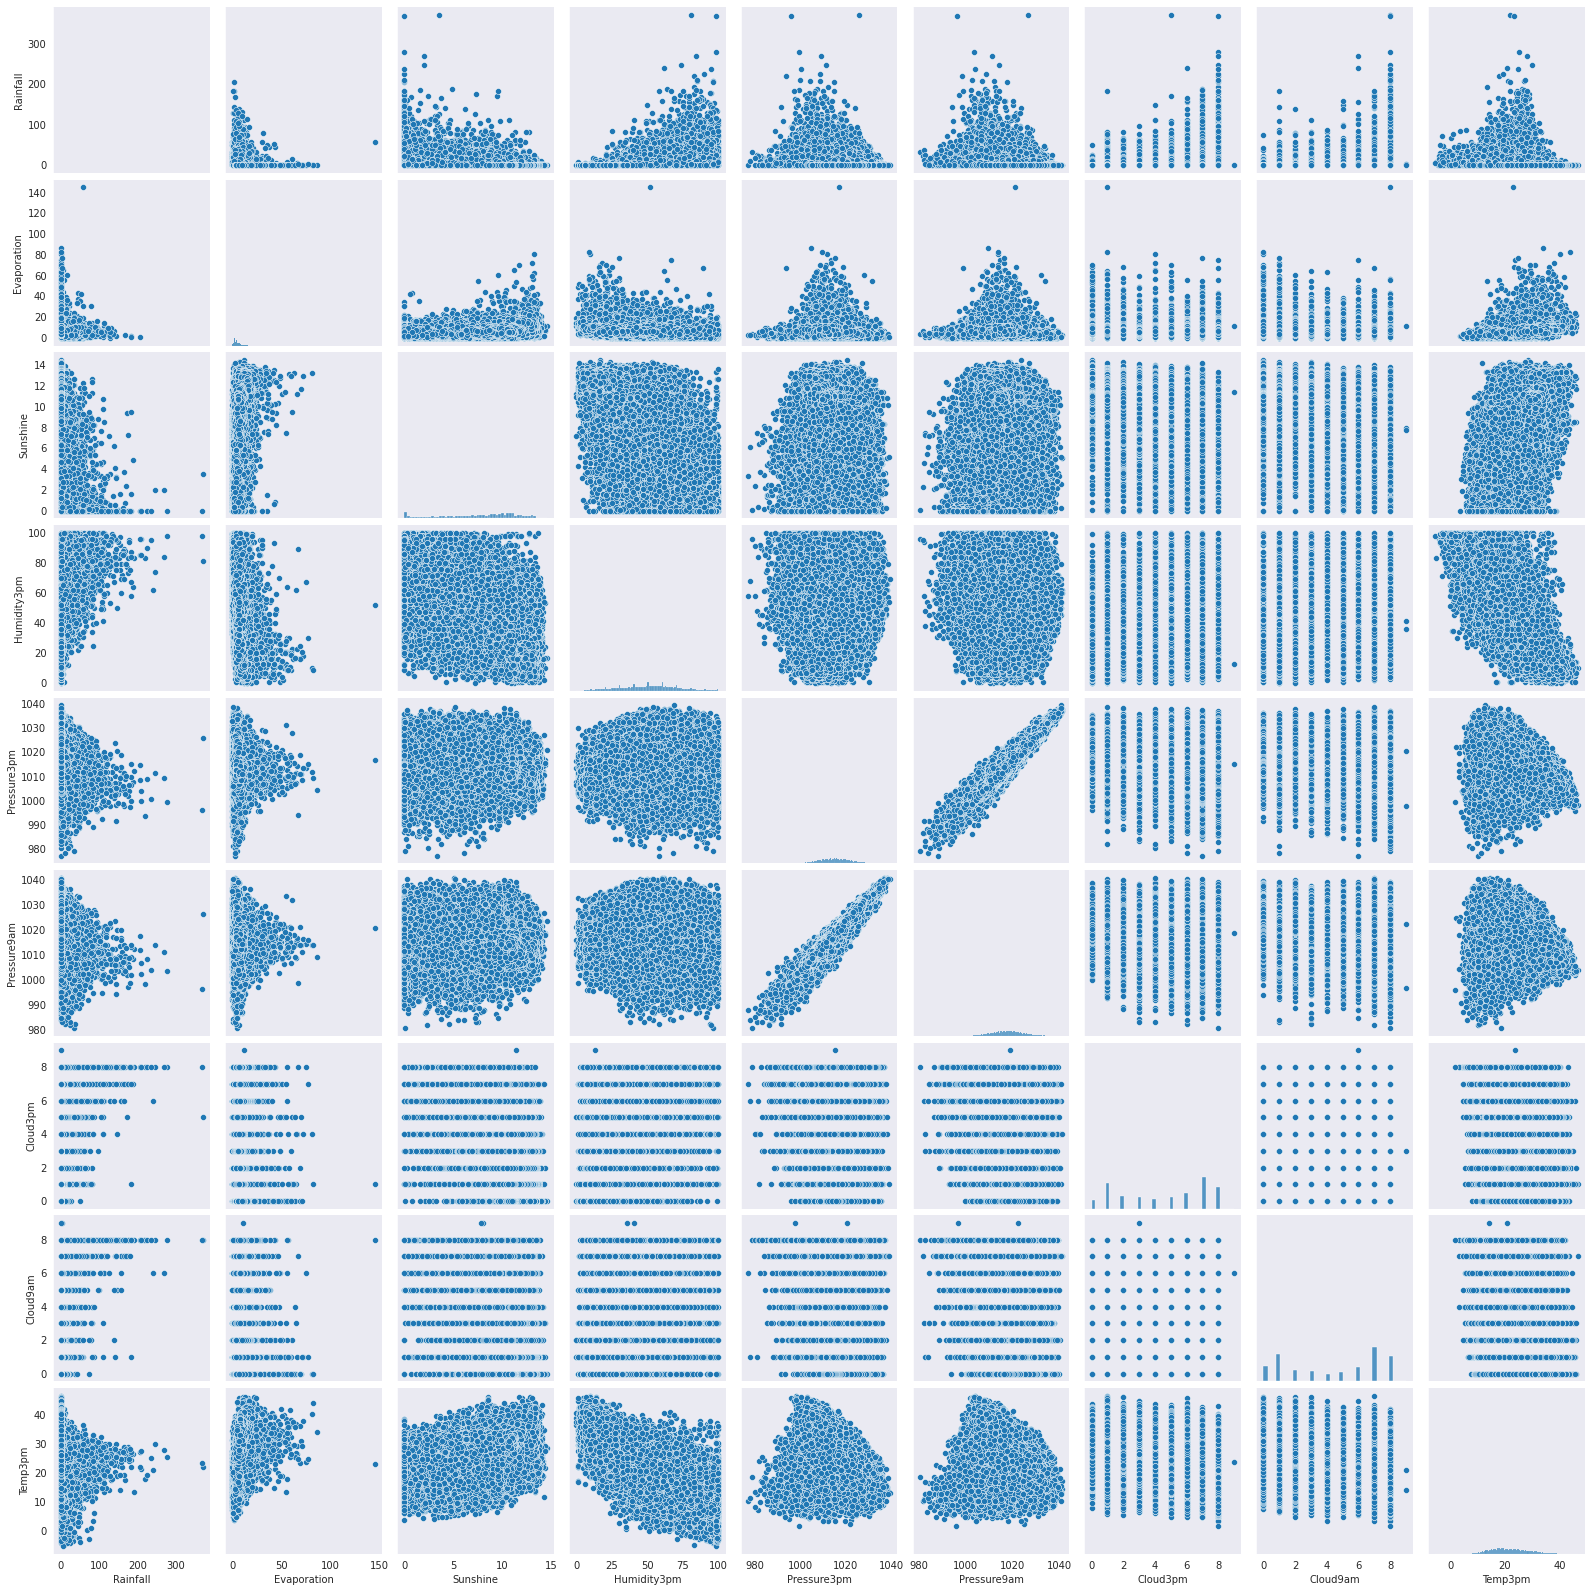

In [93]:
sns.pairplot(data=weatherAUS[['Rainfall', 'Evaporation', 'Sunshine', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Cloud3pm', 'Cloud9am', 'Temp3pm']])

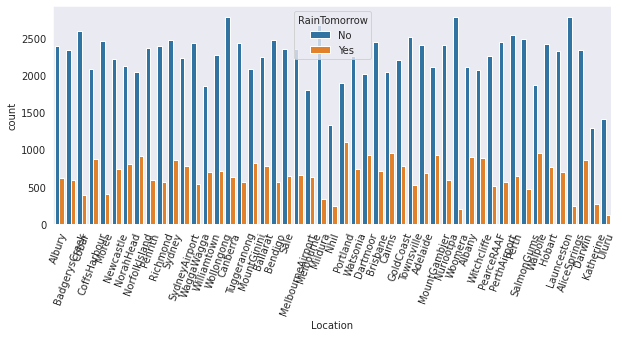

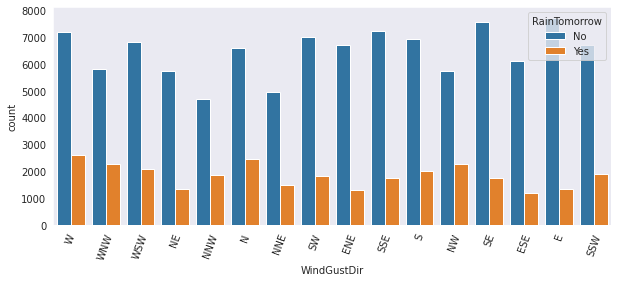

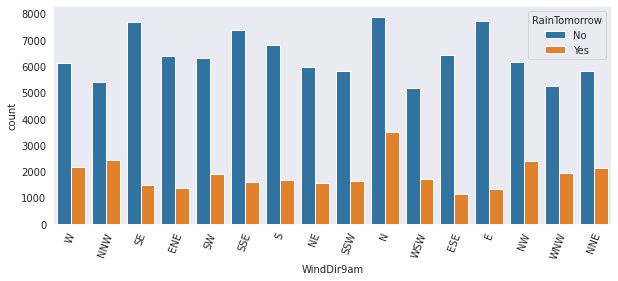

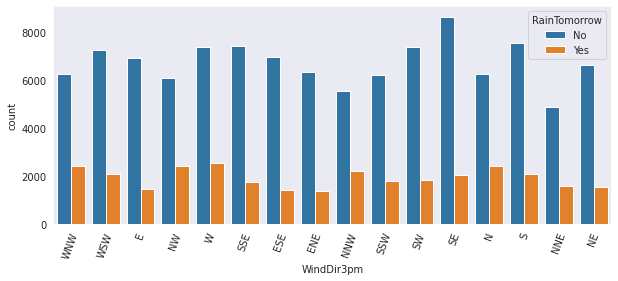

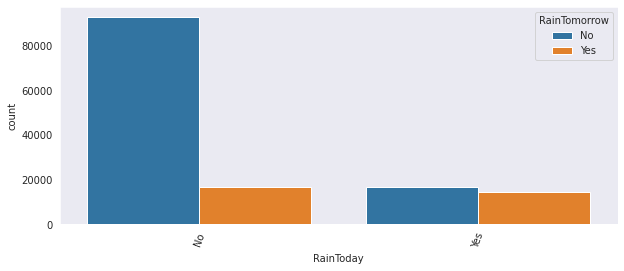

In [94]:
for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']:
    fig, ax = plt.subplots(1,1, figsize=(10, 4))
    sns.countplot(x=col, data=weatherAUS, hue='RainTomorrow')
    plt.xticks(rotation=70)
#     plt.show()

2.9 Missing Value Analysis

In [95]:
# Check for columns with null values
Null_=pd.DataFrame(weatherAUS.isna().sum(), columns=['MissingRowCount'])
Null_['MissingPercent']=Null_['MissingRowCount']/weatherAUS.shape[0]
Null_

,MissingRowCount,MissingPercent
Date,0,0.000000
Location,0,0.000000
MinTemp,1485,0.010209
MaxTemp,1261,0.008669
Rainfall,3261,0.022419
Evaporation,62790,0.431665
Sunshine,69835,0.480098
WindGustDir,10326,0.070989
WindGustSpeed,10263,0.070555
WindDir9am,10566,0.072639


## Summary of Data Visualization & Exploration Step:

There are 145460 instances and 23 variables in the data set. dataset contains mixture of categorical and numerical variables.

There is no duplicate records present in dataset.

There are some missing values in all the columns except 'Date', 'Location' in dataset. We will take care of it later. 
Variable "Evaporation", 'Sunshine', 'Cloud3pm', 'Cloud9pm' are having nearly 40% missing data. will impute missing value by median, mean or mode based on the distribution & type of data.

Dataset have significant different range of values of differet variables so scaling required.

There are some variables (Rainfall, Evaporation etc.) is having outliars. Rainfall data cannot be considered as outlier as it depends on season of the year.

There are two class values for RainTomorrow 'Yes' and 'No', meaning it is a binary classification task.

There is missing value (2.2%) in target variable 'RainTomorrow'. Class 'Yes' is only 21% as compare to 'No' which is 75% so there is a class imbalance.

"Date" variable is having high cardinality, will use feature engineering technique to fix this.

There is significant impact of "RainFall", "Evaporation", 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Pressure9pm', 'Cloud3pm', 'Cloud9pm' & 'Temp3pm' features on target 'RainTomorrow'. we will further analyze this on correlation plot. 



# 3 Data Pre-processing and cleaning

3.1 Missing Value Imputation

In [11]:
#Replace Null values with mean
for column in ['MinTemp', 'MaxTemp', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']:
    weatherAUS[column].fillna(weatherAUS[column].mean(), inplace=True)
##Replace Null values with median for skew data
for column in ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am']:
    weatherAUS[column].fillna(weatherAUS[column].median(), inplace=True)
#Replace Null values with mode for categorical data
for column in ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']:
    weatherAUS[column].fillna(weatherAUS[column].mode()[0], inplace=True)
# Remove records which does not have target column value
weatherAUS=weatherAUS[~weatherAUS['RainTomorrow'].isnull()]

In [12]:
weatherAUS.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

No missing values now.

3.2 Feature Engineering of Date Variable to reduce cardinality

Will create 3 different feature day, month,year.

In [13]:
weatherAUS['Date'] = pd.to_datetime(weatherAUS['Date'])
weatherAUS['month'] = weatherAUS.Date.apply(lambda x: x.month)
weatherAUS['day'] = weatherAUS.Date.apply(lambda x: x.day)
weatherAUS['year'] = weatherAUS.Date.apply(lambda x: x.year)
weatherAUS.drop(['Date'], 1, inplace = True)

In [14]:
weatherAUS.shape

(142193, 25)

3.3 Feature Scaling

In [15]:
for col in ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am' , 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']:
    standardScaler = StandardScaler()
    weatherAUS[col] = standardScaler.fit_transform(weatherAUS[[col]])

3.4 Fearure Transformation

In [16]:
#encoding categorical variables to numeric ones
for col in weatherAUS.columns:
    if weatherAUS[col].dtype=='object':
        labelEncoder = LabelEncoder()
        weatherAUS[col] = labelEncoder.fit_transform(weatherAUS[col])

3.5 Class Imbalance - OverSampling.

In [17]:
weatherAUS.RainTomorrow.value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [18]:
weatherAUS_No  = weatherAUS[weatherAUS['RainTomorrow']==0]   
weatherAUS_Yes = weatherAUS[weatherAUS['RainTomorrow']==1]  # one values in outcome column

weatherAUS_Yes_upsampled = resample(weatherAUS_Yes, replace = True, n_samples = 110316) 
weatherAUS = pd.concat([weatherAUS_No, weatherAUS_Yes_upsampled])

weatherAUS = shuffle(weatherAUS) # shuffling so that there is particular sequence

In [19]:
weatherAUS.RainTomorrow.value_counts()

0    110316
1    110316
Name: RainTomorrow, dtype: int64

3.6 Correlation Analysis

In [20]:
# Correlation amongst numeric attributes
corrmat = weatherAUS.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [21]:
#Checking which columns are mostly correlated with the target
weatherAUS.corr().abs()['RainTomorrow'].sort_values(ascending = False)

RainTomorrow     1.000000
Humidity3pm      0.502027
Sunshine         0.369093
Cloud3pm         0.365435
RainToday        0.334275
Humidity9am      0.315583
Cloud9am         0.310440
Pressure9am      0.271309
WindGustSpeed    0.253680
Pressure3pm      0.248276
Temp3pm          0.227031
Rainfall         0.221346
MaxTemp          0.190701
Evaporation      0.113309
WindSpeed9am     0.107222
MinTemp          0.101972
WindSpeed3pm     0.100152
WindGustDir      0.065548
WindDir9am       0.044636
WindDir3pm       0.038079
Temp9am          0.030694
year             0.013635
month            0.007653
day              0.006908
Location         0.002181
Name: RainTomorrow, dtype: float64

<b> Observation </b> 'RainTomorrow', 'Humidity3pm', 'Sunshine', 'Cloud3pm', 'RainToday', 'Humidity9am', 'Cloud9am', 'Pressure9am', 'WindGustSpeed',
       'Pressure3pm', 'Temp3pm', 'Rainfall' are having more than 20% correlation with 'Humidity3pm' is highest (50%).

# 4 Data Preparation

4.1 Separating feature vector and target variable 

In [22]:
X = weatherAUS.drop(['RainTomorrow'], axis = 1)
y = weatherAUS['RainTomorrow']

4.2 Feature Selection

In [23]:
fs = SelectKBest(score_func=f_classif, k=15)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(220632, 15)


In [24]:
# Get columns to keep and create new dataframe with those only
cols = fs.get_support(indices=True)
X_new = X.iloc[:,cols]
# print best features
X_new.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday'],
      dtype='object')

4.3 Split the dataset into training and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [26]:
# prof = ProfileReport(weatherAUS, title='MPG Pandas Profiling Report', explorative = True)
# prof.to_file(output_file=r'G:\bits\sem2\ML\Assignments\Assignment1\EDA Results.html')
#  include the interactive report as HTML iframe in the notebook
# prof.to_notebook_iframe()
# prof

# 5 Model Building & Evaluation 

5.1 Early Stopping Criteria

In [27]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

5.2 Model Creation & Compile

In [36]:
model = Sequential()
# layers
model.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
# model.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                1250      
                                                                 
 dense_7 (Dense)             (None, 20)                1020      
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,491
Trainable params: 2,491
Non-traina

5.3 Model training

In [37]:
# Fit the model
history = model.fit(X_train, y_train, epochs=250, batch_size=100, 
                     validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/250
1655/1655 [==============================] - 7s 4ms/step - loss: 0.6776 - binary_accuracy: 0.5605 - val_loss: 0.5643 - val_binary_accuracy: 0.7475
Epoch 2/250
1655/1655 [==============================] - 6s 3ms/step - loss: 0.5349 - binary_accuracy: 0.7430 - val_loss: 0.4964 - val_binary_accuracy: 0.7619
Epoch 3/250
1655/1655 [==============================] - 5s 3ms/step - loss: 0.5121 - binary_accuracy: 0.7591 - val_loss: 0.4974 - val_binary_accuracy: 0.7580
Epoch 4/250
1655/1655 [==============================] - 5s 3ms/step - loss: 0.5014 - binary_accuracy: 0.7634 - val_loss: 0.4792 - val_binary_accuracy: 0.7680
Epoch 5/250
1655/1655 [==============================] - 5s 3ms/step - loss: 0.4973 - binary_accuracy: 0.7654 - val_loss: 0.4742 - val_binary_accuracy: 0.7715
Epoch 6/250
1655/1655 [==============================] - 5s 3ms/step - loss: 0.4948 - binary_accuracy: 0.7658 - val_loss: 0.4746 - val_binary_accuracy: 0.7712
Epoch 7/250
1655/1655 [=======================

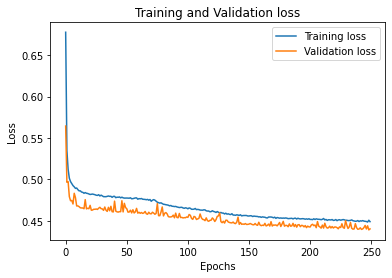

In [38]:
history_df = pd.DataFrame(history.history)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

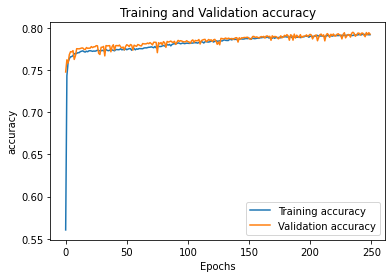

In [39]:
history_df = pd.DataFrame(history.history)

plt.plot(history.history['binary_accuracy'], label='Training accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()

# 6 Performance Evaluation

Train Data Prediction

In [40]:
y_pred = (model.predict(X_train)>0.5).astype("int32")
_accuracy = accuracy_score(y_train, y_pred)
_f1_score = f1_score(y_train, y_pred)
cm_=confusion_matrix(y_train, y_pred)
clReport=classification_report(y_train, y_pred)
print('GaussianNB - accuracy score: {} and f1_score: {}'.format(_accuracy, _f1_score))
print('Confusion Matrix: ')
print('................')
print(cm_)
print(clReport)

GaussianNB - accuracy score: 0.7953394490977435 and f1_score: 0.7973551938726665
Confusion Matrix: 
................
[[64981 17631]
 [16235 66627]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79     82612
           1       0.79      0.80      0.80     82862

    accuracy                           0.80    165474
   macro avg       0.80      0.80      0.80    165474
weighted avg       0.80      0.80      0.80    165474



Test data Prediction

In [41]:
y_pred = (model.predict(X_test)>0.5).astype("int32")
_accuracy = accuracy_score(y_test, y_pred)
_f1_score = f1_score(y_test, y_pred)
cm_=confusion_matrix(y_test, y_pred)
clReport=classification_report(y_test, y_pred)
print('GaussianNB - accuracy score: {} and f1_score: {}'.format(_accuracy, _f1_score))
print('Confusion Matrix: ')
print('................')
print(cm_)
print(clReport)

GaussianNB - accuracy score: 0.7923238696109358 and f1_score: 0.7940526060300966
Confusion Matrix: 
................
[[21620  6084]
 [ 5371 22083]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     27704
           1       0.78      0.80      0.79     27454

    accuracy                           0.79     55158
   macro avg       0.79      0.79      0.79     55158
weighted avg       0.79      0.79      0.79     55158



<b> Observation: </b> 
For ANN model, we have used 3 hidden layers with 50, 20 & 10 neurons respectively. 

After following all the necessary steps, model is able to predict rain with 79.2% accuracy for both category. As it is classification task, F1 score will be the ideal parameter specially if data is imbalance instead of accuracy as it tries to balance between precision and recall. Here F1 score is also 79.4% for test data. we will try to improve it further based on Hyper Parameter tuning.

In accuracy vs epoch curve also, accuracy is keep increasing with epoch. we can increase epoch size also to stabilize it further but it is taking lot of time to run.

Confusion matrix also tell us similar story. TP & TN are quite balance however FN are little higher then FP.

In the Classificatio report, precision, recall, f1-score each are quite good for each class which shows robustness of model.

# 6 Hyper Parameter Tuning

In this we will use keras-tuner library to optimize number of layers, number of units in each layer, dropout rate & learning rate of optimizer. We can tune further more parameter but for time being we are only doint this.

In [45]:
def create_model(hp):

    model = Sequential()
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    # Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 5
    # Number of Units: 32 - 128 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 2, 6)):
        model.add(
            Dense(
                units=hp.Int("units_" + str(i), min_value=50, max_value=250, step=50),
                activation="relu", kernel_initializer = 'uniform')
            )
        
        # Tune dropout layer with values from 0 - 0.3 with stepsize of 0.1.
        model.add(Dropout(hp.Float("dropout_" + str(i), 0, 0.3, step=0.1)))
    
    # Add output layer.
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    opt=Adam(learning_rate=hp_learning_rate)
    # Define optimizer, loss, and metrics
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    
    return model

In [47]:
tuner = kt.RandomSearch(create_model,
                     objective="val_binary_accuracy",
                     max_trials=5,
                     executions_per_trial=3,
                     directory="weather_dir2",
                     project_name="Weather_Tuning")


# Display search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 250, 'step': 50, 'sampling': None}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_test, y_test))

Trial 1 Complete [01h 31m 06s]
val_binary_accuracy: 0.8020353515942892

Best val_binary_accuracy So Far: 0.8020353515942892
Total elapsed time: 01h 31m 06s

Search: Running Trial #2

Hyperparameter    |Value             |Best Value So Far 
num_layers        |5                 |4                 
units_1           |150               |100               
dropout_1         |0.2               |0.1               
learning_rate     |0.001             |0.0001            
units_2           |100               |50                
dropout_2         |0.1               |0                 
units_3           |150               |50                
dropout_3         |0.2               |0                 

Epoch 1/100
5172/5172 [==============================] - 25s 5ms/step - loss: 0.5140 - binary_accuracy: 0.7369 - val_loss: 0.5115 - val_binary_accuracy: 0.7442
Epoch 2/100
5172/5172 [==============================] - 23s 4ms/step - loss: 0.4818 - binary_accuracy: 0.7700 - val_loss: 0.4686 - val_binary_

Based on this hyper parameter tuning, model accuracy is further increased to 80.2%.